In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Final Project/DataSet/thinking.csv')
X = df[['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.36994357638888886
Precision: 0.40738230949741133
Recall: 0.36994357638888886
F1 Score: 0.3773206803014287


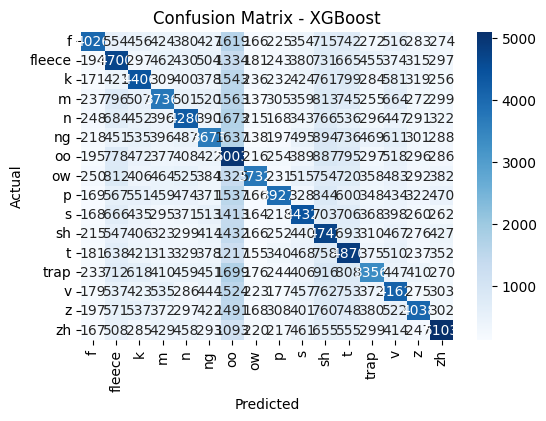

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train_encoded)

y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")




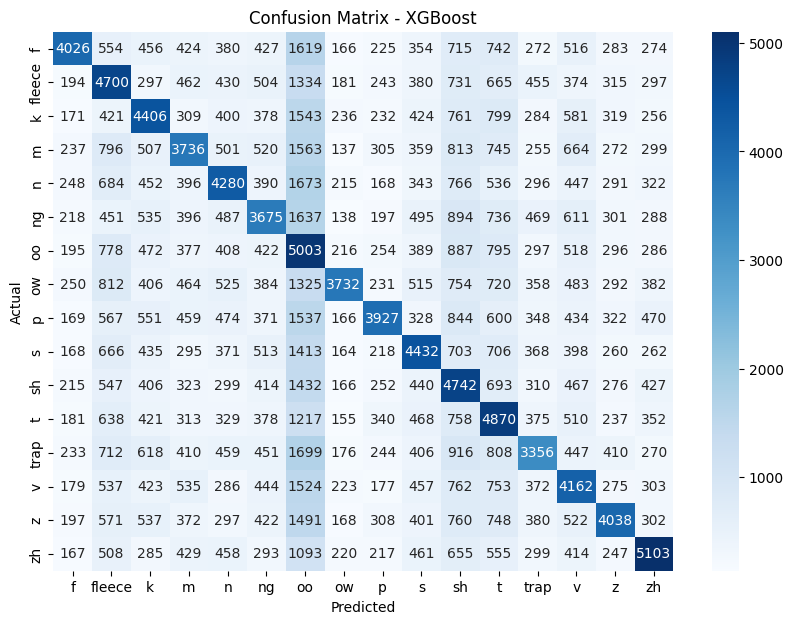

In [ ]:
#Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

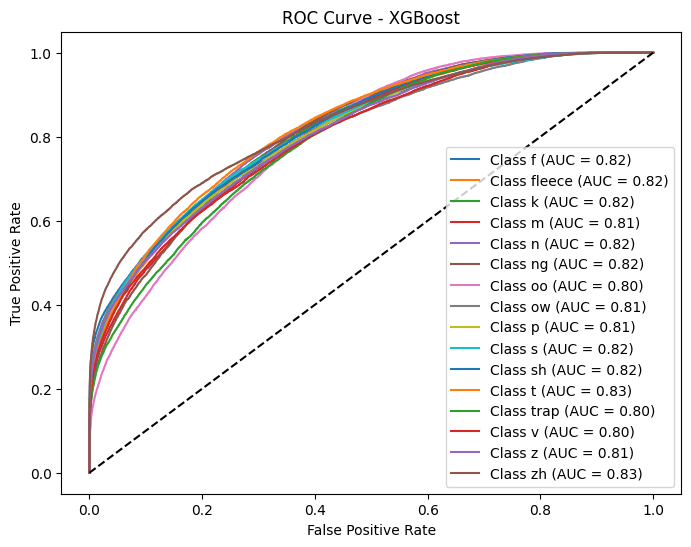

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = xgb_model.predict_proba(X_test)
n_classes = len(label_encoder.classes_)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


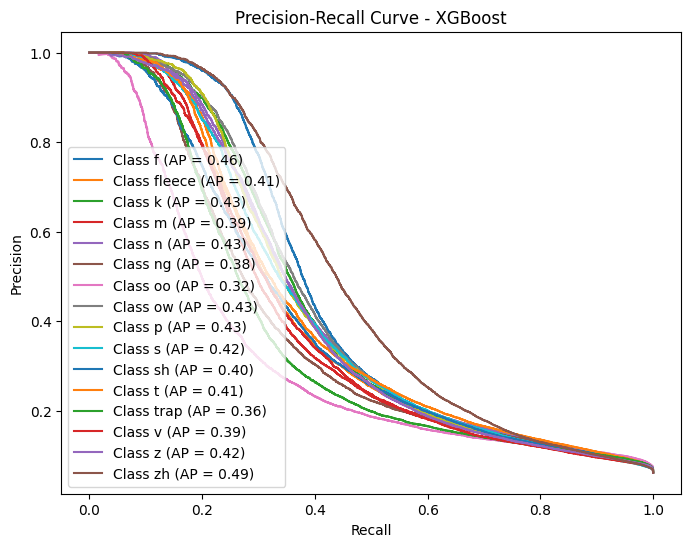

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    avg_precision = average_precision_score((y_test_encoded == i).astype(int), y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"Class {label_encoder.classes_[i]} (AP = {avg_precision:.2f})")

plt.title("Precision-Recall Curve - XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()


<Figure size 800x600 with 0 Axes>

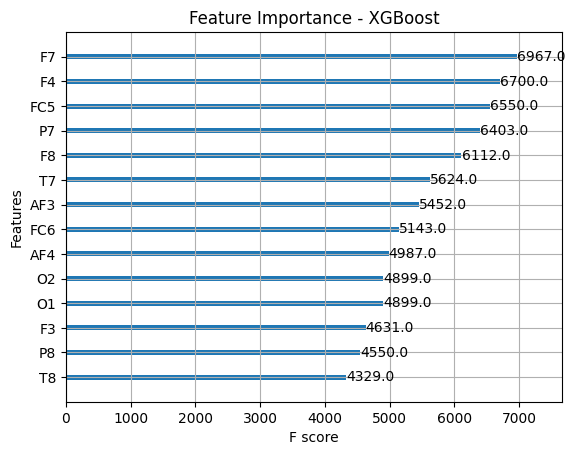

In [ ]:
from xgboost import plot_importance

# Feature plot
plt.figure(figsize=(8, 6))
plot_importance(xgb_model, importance_type='weight', title="Feature Importance - XGBoost")
plt.show()


In [ ]:
#Metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Confusion Matrix": conf_matrix.tolist() 
}

with open('xgboost_metrics.txt', 'w') as f:
    f.write("XGBoost Model Metrics\n")
    f.write("=====================\n")
    for key, value in metrics.items():
        if key == "Confusion Matrix":
            f.write(f"{key}:\n")
            for row in value:
                f.write(f"{row}\n")
        else:
            f.write(f"{key}: {value}\n")

print("Metrics saved as 'xgboost_metrics.txt'")


Metrics saved as 'xgboost_metrics.txt'


In [ ]:
import joblib

joblib.dump(xgb_model, 'xgboost_model.pkl')
print("XGBoost model saved as 'xgboost_model.pkl'")


XGBoost model saved as 'xgboost_model.pkl'
